# Prepare Data

* Load wav files
* Convert to mel-spectrograms
* Save as training data for network

In [1]:
%matplotlib inline

import json
import shutil
import pickle
from pathlib import Path

import numpy as np
import librosa

from src.config import SOUND_PATH_LIST, SAMPLE_RATE, SPECTROGRAM_PATH
from src.helper_functions import plot_wav, plot_spectrogram

## Creating the Spectrograms

In [2]:
def read_wavfile(path: Path, sr: int):
    waveform, _ = librosa.core.load(path, sr)
    waveform = np.trim_zeros(waveform)
    return waveform


def get_spectrogram(waveform: np.ndarray, sr: int):
    spec = librosa.feature.melspectrogram(waveform.astype(float), sr)
    return librosa.power_to_db(spec, ref=np.max)

Name: Hi Hats (61).wav - Duration 0.05


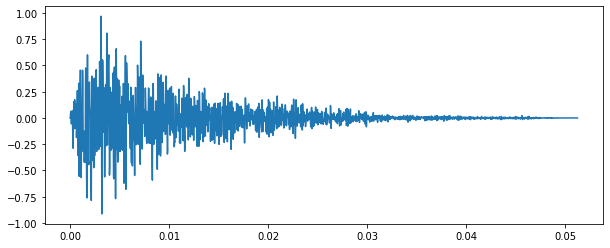

In [4]:
i = np.random.randint(len(SOUND_PATH_LIST))
sound = SOUND_PATH_LIST[i]
waveform = read_wavfile(sound, SAMPLE_RATE)
print(f"Name: {sound.name} - Duration {waveform.shape[0] / SAMPLE_RATE:.2f}")
plot_wav(waveform, SAMPLE_RATE)

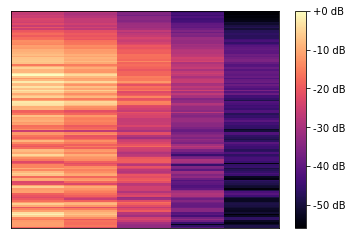

In [5]:
spec = get_spectrogram(waveform, SAMPLE_RATE)
plot_spectrogram(spec)

## Save Spectrograms

Calculate spectrograms for all samples and save them as a pickle file

In [ ]:
spectrograms = []
for sound_path in SOUND_PATH_LIST:
    waveform = read_wavfile(sound_path, SAMPLE_RATE)
    spec = get_spectrogram(waveform, SAMPLE_RATE)
    if spec.shape[0] == 128:
        spectrograms.append(spec)

with SPECTROGRAM_PATH.open("wb") as fp:
    pickle.dump(spectrograms, fp)